In [209]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_log_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [146]:
df= pd.read_csv('train.csv')

In [147]:
df.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [148]:
df.drop(['id'],axis=1,inplace=True)

In [154]:
db

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,bandgap_energy_ev
0,432,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,3.4387
1,353,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,2.9210
2,393,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,2.7438
3,374,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,3.3492
4,353,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,1.3793
...,...,...,...,...,...,...,...,...,...,...,...,...
2395,432,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015,3.7349
2396,374,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007,3.4915
2397,490,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954,3.2750
2398,432,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004,1.3915


In [150]:
df.spacegroup.value_counts().to_dict()
frequency_map = df.spacegroup.value_counts().to_dict()
df.spacegroup = df.spacegroup.map(frequency_map )

In [152]:
db=df.drop(['formation_energy_ev_natom'],axis=1)

In [155]:
X=db.drop('bandgap_energy_ev',axis=1)

In [156]:
Y=db['bandgap_energy_ev']

In [157]:
from sklearn.model_selection import train_test_split
Xb_train, Xb_test, Yb_train, Yb_test = train_test_split( X, Y, test_size=0.20, random_state=42)

In [179]:
Xb_test

array([[-0.63707711, -1.39398458, -1.46347976, ..., -0.17685232,
        -0.44862803,  0.97447887],
       [ 1.69326408,  0.81686161, -0.16807251, ..., -0.17486101,
        -0.44796655, -0.19006179],
       [ 0.52809348, -0.95181534,  1.3624523 , ..., -0.17434474,
        -0.44813665, -0.18987548],
       ...,
       [ 1.69326408,  0.81686161, -1.11004986, ..., -0.17655731,
        -0.44840124, -0.1899764 ],
       [-0.95850348,  0.81686161, -0.16807251, ..., -0.17729484,
         2.35036442, -0.18992982],
       [-0.2553833 , -0.95181534,  0.42047495, ...,  0.67941295,
        -0.19386319, -2.49597154]])

In [159]:
scaler = preprocessing.StandardScaler().fit(Xb_train)
Xb_train = scaler.transform(Xb_train)
Xb_test=scaler.transform(Xb_test)

In [245]:
pca = PCA(n_components=6)
#X_reduced = pca.fit_transform(X)

In [228]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [229]:
regr = LinearRegression()
mse = []

In [230]:
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), Y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

In [231]:
for i in np.arange(1, 10):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], Y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'hp')

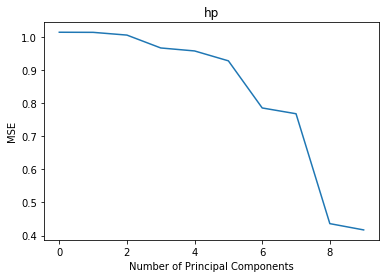

In [232]:
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [246]:
X_reduced_train = pca.fit_transform(scale(Xb_train))
X_reduced_test = pca.transform(scale(Xb_test))[:,:1]

In [247]:
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], Yb_train)
pred = regr.predict(X_reduced_test)

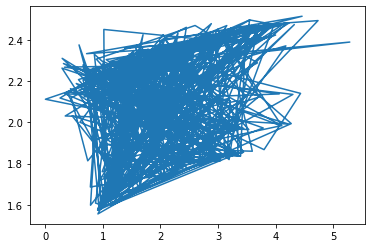

In [249]:
plt.plot(Yb_test,pred)

In [160]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(Xb_train,Yb_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [161]:
Yb_pred=regressor.predict(Xb_test)

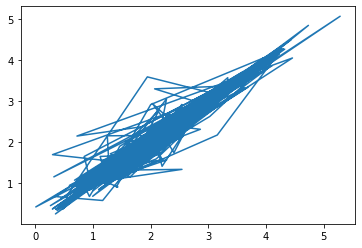

In [250]:
plt.plot(Yb_test,Yb_pred)

In [251]:
r2=r2_score(Yb_test,Yb_pred)
r2

0.9358359707479013

In [164]:
reg= MLPRegressor(hidden_layer_sizes=(8),activation="relu" ,random_state=1, max_iter=2000).fit(Xb_train, Yb_train)

In [165]:
Yb_pred2=reg.predict(Xb_test)

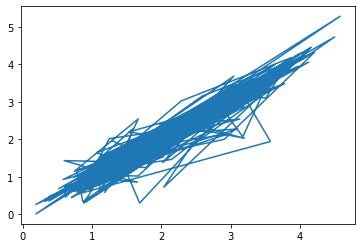

In [166]:
plt.plot(Yb_pred2,Yb_test)

In [167]:
r22=r2_score(Yb_test,Yb_pred2)
r22

0.9251431550183392

In [168]:
dfo=df.drop(['bandgap_energy_ev'],axis=1)

In [169]:
dfo.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom
0,432,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680
1,353,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490
2,393,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821
3,374,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172
4,353,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505


In [170]:
x=dfo.drop('formation_energy_ev_natom',axis=1)
y=dfo['formation_energy_ev_natom']

In [172]:
x

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,432,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017
1,353,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025
2,393,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185
3,374,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017
4,353,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893
...,...,...,...,...,...,...,...,...,...,...,...
2395,432,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015
2396,374,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007
2397,490,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954
2398,432,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004


In [178]:
from sklearn.model_selection import train_test_split
xb_train, xb_test, yb_train, yb_test = train_test_split( x, y, test_size=0.20, random_state=42)

In [177]:
xb_test

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
2037,374,30.0,0.0000,0.6667,0.3333,5.2326,5.2320,13.9994,90.0004,89.9997,120.0003
1978,490,80.0,0.3438,0.3750,0.2812,9.5090,9.5087,9.5087,90.0031,90.0032,89.9967
855,432,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015
1719,393,40.0,0.9375,0.0625,0.0000,5.6994,5.6995,13.9860,90.0080,89.9898,120.0040
2019,393,40.0,0.8125,0.1875,0.0000,9.8390,5.6764,13.8993,92.1548,92.0238,30.1576
...,...,...,...,...,...,...,...,...,...,...,...
1832,358,80.0,0.2812,0.3125,0.4062,24.5221,6.3164,6.2360,89.9999,104.8685,90.0001
203,353,80.0,0.0312,0.4688,0.5000,6.7431,6.7427,24.7186,90.0005,89.9974,119.9883
174,490,80.0,0.0938,0.0625,0.8438,10.1125,10.1124,10.1127,90.0008,90.0009,89.9989
420,358,80.0,0.3438,0.2812,0.3750,24.4654,6.2812,6.1912,89.9998,104.8096,90.0001


In [180]:
xb_test

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
2037,374,30.0,0.0000,0.6667,0.3333,5.2326,5.2320,13.9994,90.0004,89.9997,120.0003
1978,490,80.0,0.3438,0.3750,0.2812,9.5090,9.5087,9.5087,90.0031,90.0032,89.9967
855,432,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015
1719,393,40.0,0.9375,0.0625,0.0000,5.6994,5.6995,13.9860,90.0080,89.9898,120.0040
2019,393,40.0,0.8125,0.1875,0.0000,9.8390,5.6764,13.8993,92.1548,92.0238,30.1576
...,...,...,...,...,...,...,...,...,...,...,...
1832,358,80.0,0.2812,0.3125,0.4062,24.5221,6.3164,6.2360,89.9999,104.8685,90.0001
203,353,80.0,0.0312,0.4688,0.5000,6.7431,6.7427,24.7186,90.0005,89.9974,119.9883
174,490,80.0,0.0938,0.0625,0.8438,10.1125,10.1124,10.1127,90.0008,90.0009,89.9989
420,358,80.0,0.3438,0.2812,0.3750,24.4654,6.2812,6.1912,89.9998,104.8096,90.0001


In [181]:
scaler2 = preprocessing.StandardScaler().fit(xb_train)
xb_train = scaler.transform(xb_train)
xb_test=scaler.transform(xb_test)

In [183]:
xb_test

array([[-0.63707711, -1.39398458, -1.46347976, ..., -0.17685232,
        -0.44862803,  0.97447887],
       [ 1.69326408,  0.81686161, -0.16807251, ..., -0.17486101,
        -0.44796655, -0.19006179],
       [ 0.52809348, -0.95181534,  1.3624523 , ..., -0.17434474,
        -0.44813665, -0.18987548],
       ...,
       [ 1.69326408,  0.81686161, -1.11004986, ..., -0.17655731,
        -0.44840124, -0.1899764 ],
       [-0.95850348,  0.81686161, -0.16807251, ..., -0.17729484,
         2.35036442, -0.18992982],
       [-0.2553833 , -0.95181534,  0.42047495, ...,  0.67941295,
        -0.19386319, -2.49597154]])

In [188]:
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(n_estimators=300)
regressor2.fit(xb_train,yb_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [189]:
yb_pred=regressor2.predict(xb_test)

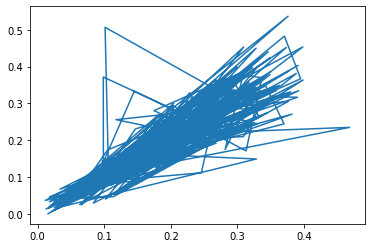

In [190]:
plt.plot(yb_pred,yb_test)

In [191]:
R2=r2_score(yb_test,yb_pred)
R2

0.788500609504043

In [200]:
reg2= MLPRegressor(hidden_layer_sizes=(100,100),activation="relu" ,random_state=1, max_iter=500).fit(xb_train, yb_train)

In [201]:
yb_pred2=reg2.predict(xb_test)

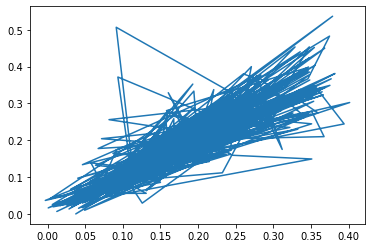

In [202]:
plt.plot(yb_pred2,yb_test)

In [203]:
R2=r2_score(yb_test,yb_pred2)
R2

0.7500857126033184